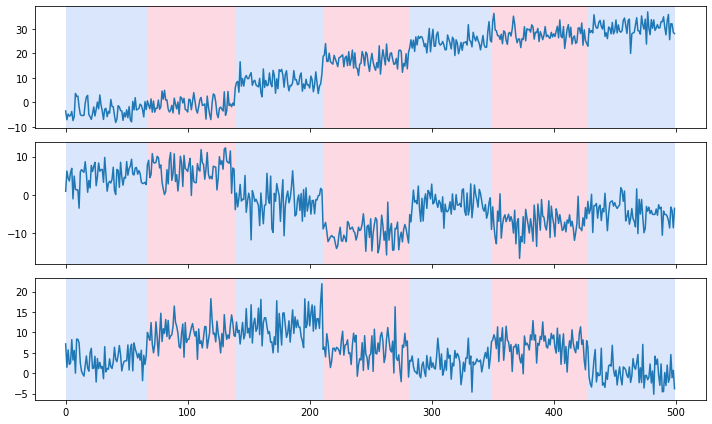

In [7]:
import time  # for execution time comparison

import matplotlib.pyplot as plt  # for display purposes

import ruptures as rpt  # our package
from ruptures.metrics import hausdorff

# generate signal
n_samples, dim, sigma = 500, 3, 3
n_bkps = 6  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
fig, ax_array = rpt.display(signal, bkps)

In [17]:
type(signal)

numpy.ndarray

In [8]:
algo_python = rpt.Dynp(model="l2", jump=1, min_size=2).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=2).fit(signal)  # written in C

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	6.165 s
C implementation:	0.003 s


In [9]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[67, 139, 211, 282, 349, 429, 500]
C implementation:	[67, 139, 211, 282, 349, 429, 500]
(Hausdorff distance: 0 samples)


In [10]:
algo_python = rpt.Pelt(model="l2", jump=1, min_size=2).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=2).fit(
    signal
)  # written in C, same class as before


penalty_value = 100  # beta

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(pen=penalty_value)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.471 s
C implementation:	0.000 s


In [11]:
bkps_python = algo_python.predict(pen=penalty_value)
bkps_c = algo_c.predict(pen=penalty_value)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[8, 12, 67, 79, 83, 139, 196, 211, 282, 349, 429, 500]
C implementation:	[8, 12, 67, 79, 83, 139, 196, 211, 282, 349, 429, 500]
(Hausdorff distance: 0 samples)


In [12]:
params = {"gamma": 1e-2}
algo_python = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", params=params, min_size=2).fit(
    signal
)  # written in C

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	6.791 s
C implementation:	0.006 s


In [13]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[67, 139, 211, 282, 349, 429, 500]
C implementation:	[67, 139, 211, 282, 349, 429, 500]
(Hausdorff distance: 0 samples)


In [14]:
algo_python = rpt.Pelt(model="rbf", jump=1, min_size=2).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", min_size=2).fit(
    signal
)  # written in C, same class as before


penalty_value = 1  # beta

for (label, algo) in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(pen=penalty_value)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

Python implementation:	0.308 s
C implementation:	0.000 s


In [15]:
bkps_python = algo_python.predict(pen=penalty_value)
bkps_c = algo_c.predict(pen=penalty_value)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[67, 139, 211, 282, 349, 429, 500]
C implementation:	[67, 139, 211, 282, 349, 429, 500]
(Hausdorff distance: 0 samples)
